In [7]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications.resnet import ResNet50
from keras.applications import VGG16, DenseNet121, InceptionV3, VGG19, MobileNetV2
from tensorboard import notebook
from tensorflow import keras
import numpy as np
import sys
sys.path.append("/root/autodl-tmp/training_tool/")
from training_tool import load_data, draw_curve, draw_matrix, TimeHistory

100%|██████████| 186/186 [00:00<00:00, 195.61it/s]


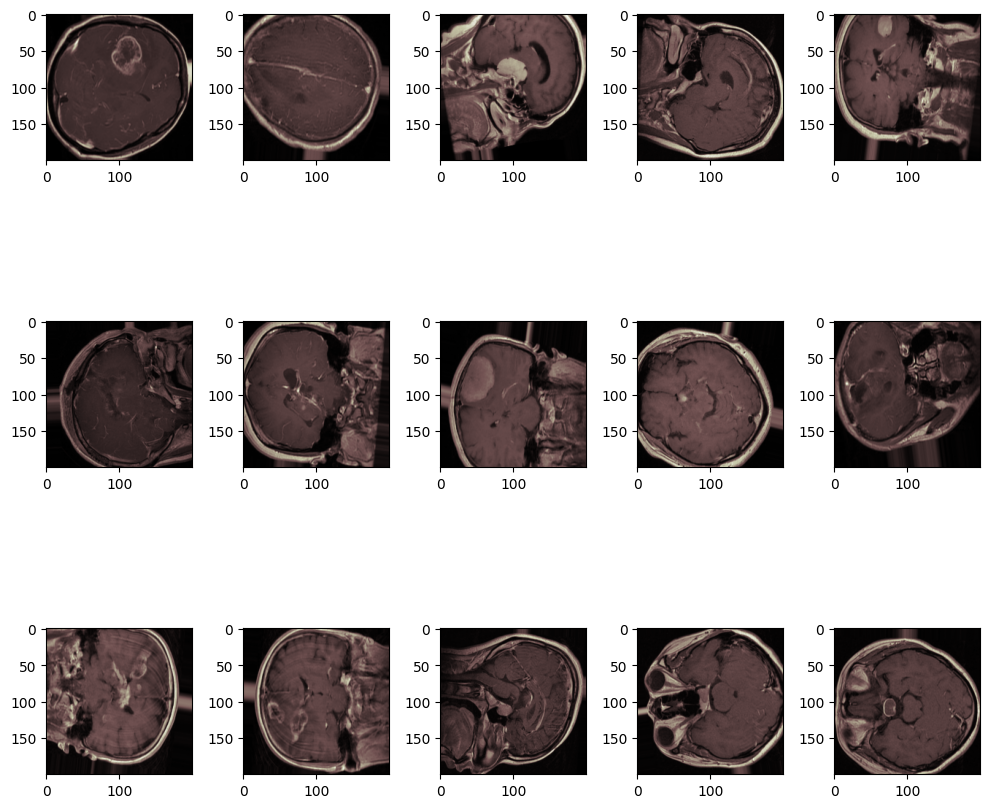

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)


In [2]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)

In [7]:
net = MobileNetV2(weights=None, include_top=False, input_shape=(image_size, image_size, 3), classes=3)

model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)

adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 100, 100, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 100, 100, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [8]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-MobileNetV2.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])

Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 0.8340 - accuracy: 0.6658
Epoch 1: saving model to model-MobileNetV21.h5
Epoch 1: 22.28 seconds
264/264 [==============================] - 22s 73ms/step - loss: 0.8348 - accuracy: 0.6656 - val_loss: 2.5417 - val_accuracy: 0.3359 - lr: 0.0100
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.5431 - accuracy: 0.7932
Epoch 2: saving model to model-MobileNetV21.h5
Epoch 2: 18.10 seconds
264/264 [==============================] - 18s 69ms/step - loss: 0.5438 - accuracy: 0.7929 - val_loss: 1.4496 - val_accuracy: 0.3321 - lr: 0.0100
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.4398 - accuracy: 0.8276
Epoch 3: saving model to model-MobileNetV21.h5
Epoch 3: 18.12 seconds
264/264 [==============================] - 18s 69ms/step - loss: 0.4395 - accuracy: 0.8279 - val_loss: 25.3552 - val_accuracy: 0.3321 - lr: 0.0100
Epoch 4/50
263/264 [============================>.] - ETA: 0s -

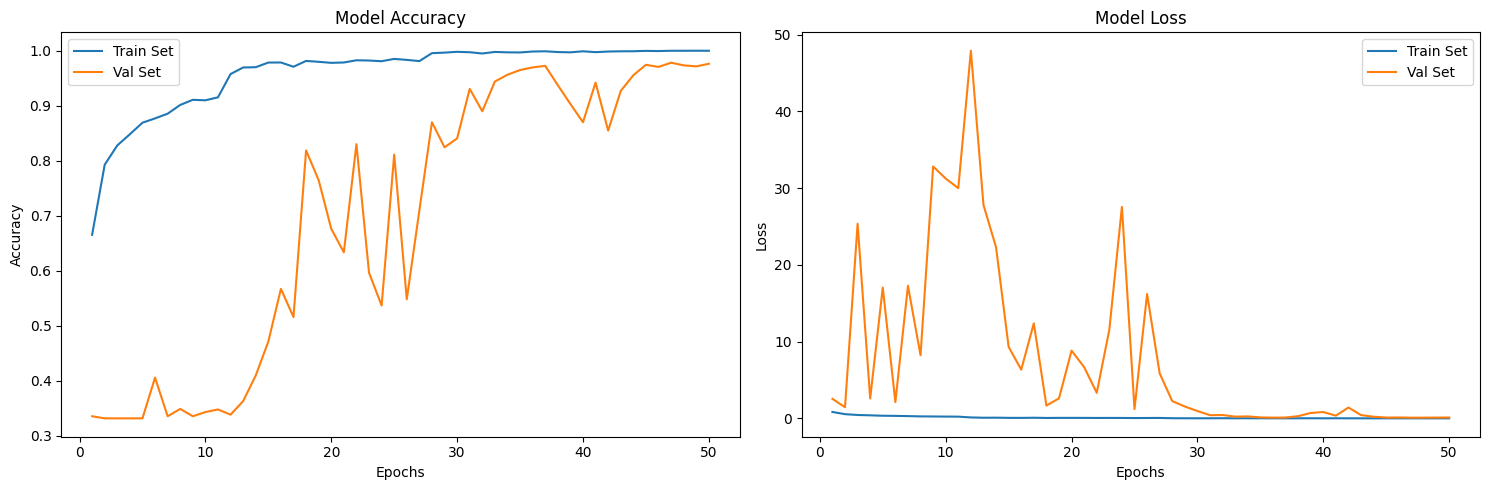

In [9]:
draw_curve(history)

20/20 [==============================] - 0s 9ms/step - loss: 0.2157 - accuracy: 0.9511
Test Accuracy:  95.11
              precision    recall  f1-score   support

      glioma     0.9649    0.9615    0.9632       286
  meningioma     0.9028    0.9155    0.9091       142
   pituitary     0.9676    0.9624    0.9650       186

    accuracy                         0.9511       614
   macro avg     0.9451    0.9465    0.9458       614
weighted avg     0.9513    0.9511    0.9512       614



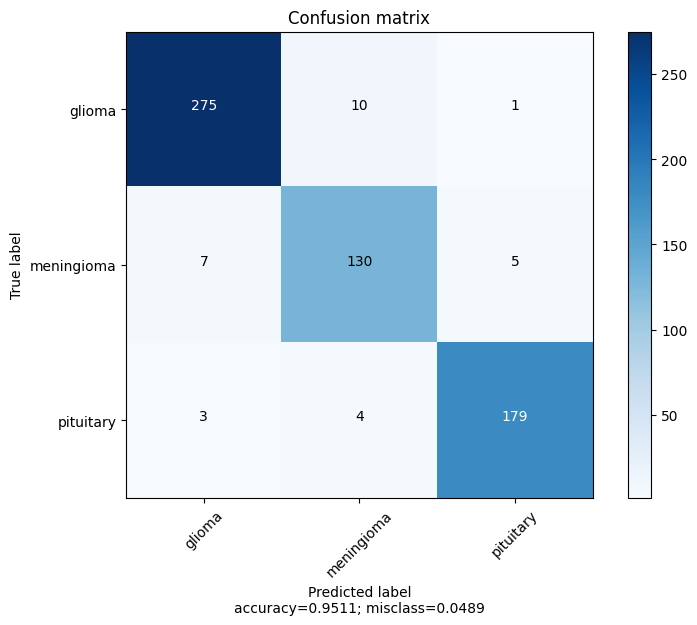

In [10]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

In [11]:
%reset -f

100%|██████████| 186/186 [00:00<00:00, 193.49it/s]


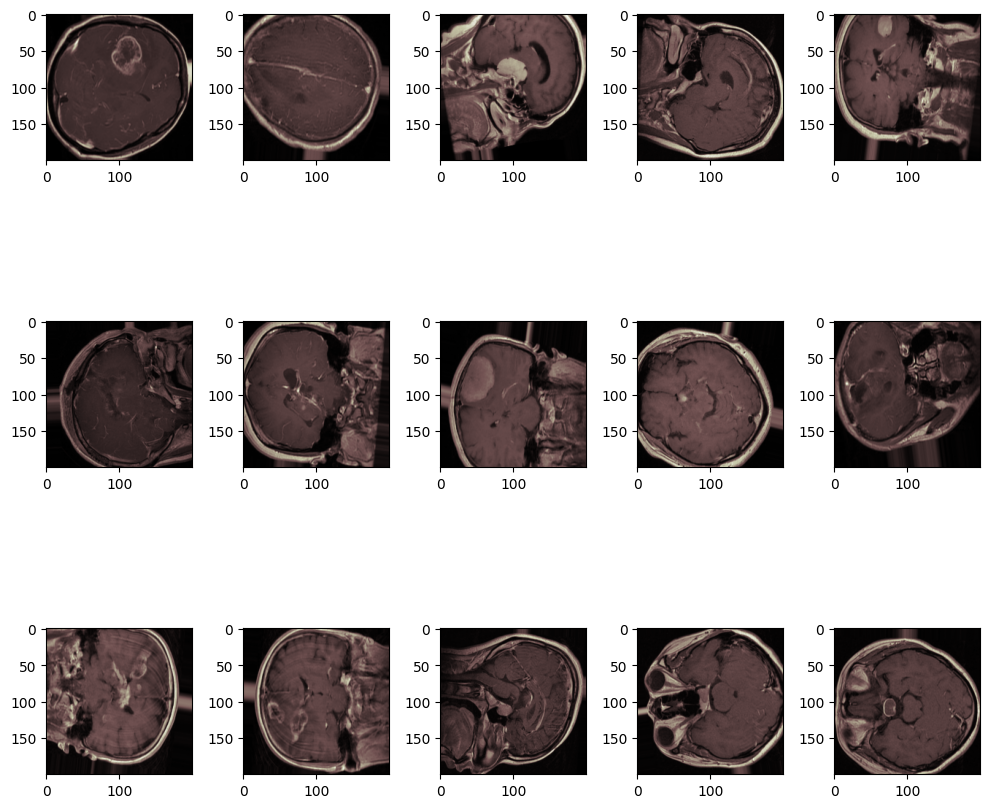

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)


2023-12-09 20:57:52.907329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-09 20:57:53.238702: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:c3:00.0, compute capability: 8.9


Epoch 1/50


2023-12-09 20:58:01.872703: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-12-09 20:58:02.415251: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2023-12-09 20:58:02.415381: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2023-12-09 20:58:02.415585: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-09 20:58:02.915488: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 0.8790 - accuracy: 0.6591
Epoch 1: saving model to model-MobileNetV22.h5
Epoch 1: 24.13 seconds
264/264 [==============================] - 24s 72ms/step - loss: 0.8790 - accuracy: 0.6591 - val_loss: 1.4888 - val_accuracy: 0.3321 - lr: 0.0100
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.5200 - accuracy: 0.8023
Epoch 2: saving model to model-MobileNetV22.h5
Epoch 2: 17.81 seconds
264/264 [==============================] - 18s 67ms/step - loss: 0.5195 - accuracy: 0.8025 - val_loss: 1.2302 - val_accuracy: 0.3321 - lr: 0.0100
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.4102 - accuracy: 0.8450
Epoch 3: saving model to model-MobileNetV22.h5
Epoch 3: 17.79 seconds
264/264 [==============================] - 18s 67ms/step - loss: 0.4099 - accuracy: 0.8452 - val_loss: 1.1210 - val_accuracy: 0.4298 - lr: 0.0100
Epoch 4/50
263/264 [============================>.] - ETA: 0s - loss: 0.354

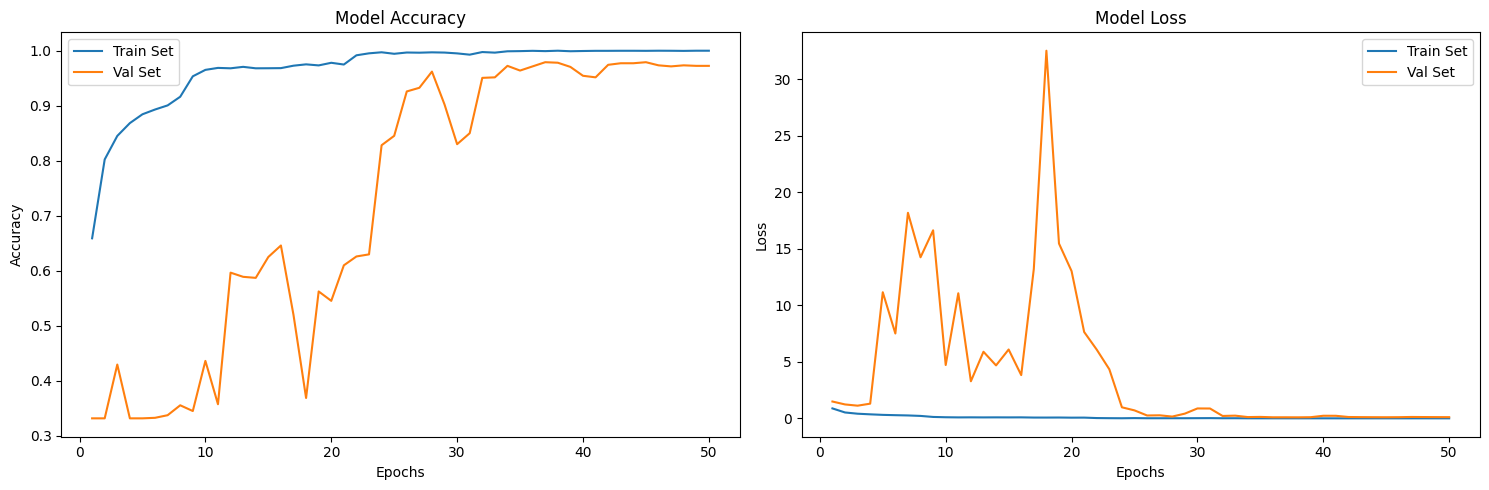

20/20 [==============================] - 0s 9ms/step - loss: 0.1404 - accuracy: 0.9674
Test Accuracy:  96.74
              precision    recall  f1-score   support

      glioma     0.9625    0.9860    0.9741       286
  meningioma     0.9847    0.9085    0.9451       142
   pituitary     0.9632    0.9839    0.9734       186

    accuracy                         0.9674       614
   macro avg     0.9701    0.9594    0.9642       614
weighted avg     0.9678    0.9674    0.9672       614



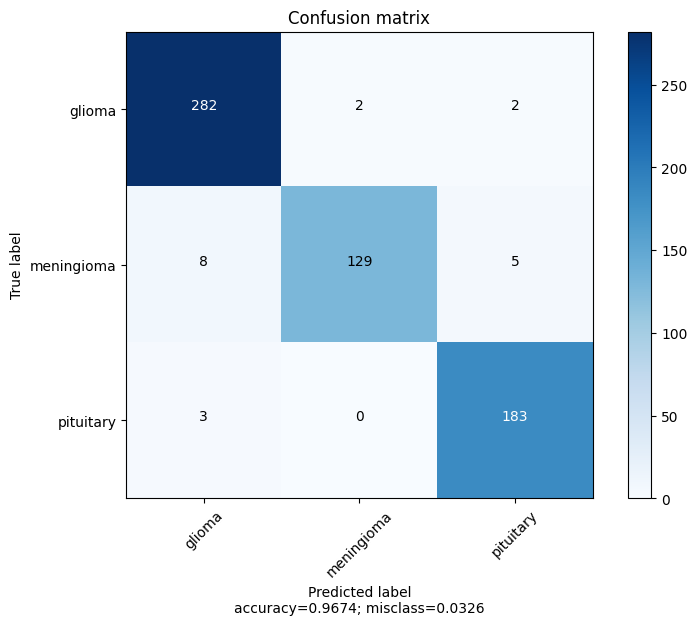

In [2]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = MobileNetV2(weights=None, include_top=False, input_shape=(image_size, image_size, 3), classes=3)
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-MobileNetV22.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f


100%|██████████| 186/186 [00:00<00:00, 193.74it/s]


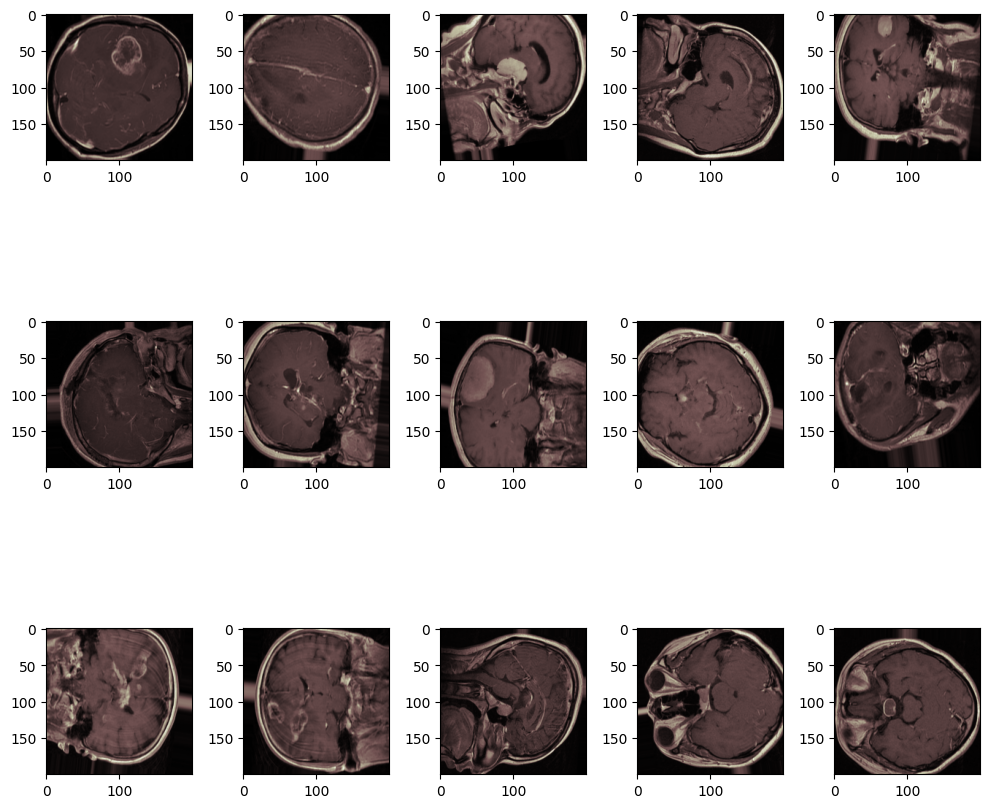

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)
Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 0.9513 - accuracy: 0.6247
Epoch 1: saving model to model-MobileNetV2.h5
Epoch 1: 22.41 seconds
264/264 [==============================] - 22s 73ms/step - loss: 0.9515 - accuracy: 0.6250 - val_loss: 1.2474 - val_accuracy: 0.3359 - lr: 0.0100
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.5605 - accuracy: 0.7805
Epoch 2: saving model to model-MobileNetV2.h5
Epoch 2: 18.14 seconds
264/264 [==============================] - 18s 69ms/step - loss: 0.5601 - accuracy: 0.7807 - val_loss: 1.3594 - val_accuracy: 0.3359 - lr: 0.0100
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.4241 - accuracy: 0.8346
Epoch 3: saving model to model-MobileNetV2.h5
Epoch 3: 18.24 seconds
264/264 [==============================] - 18s 69ms/step - loss: 0.4242 - accuracy: 0.8347 - val_loss: 1.4388 - val_accuracy: 0.3321 - lr: 0.0100
Epoch 4

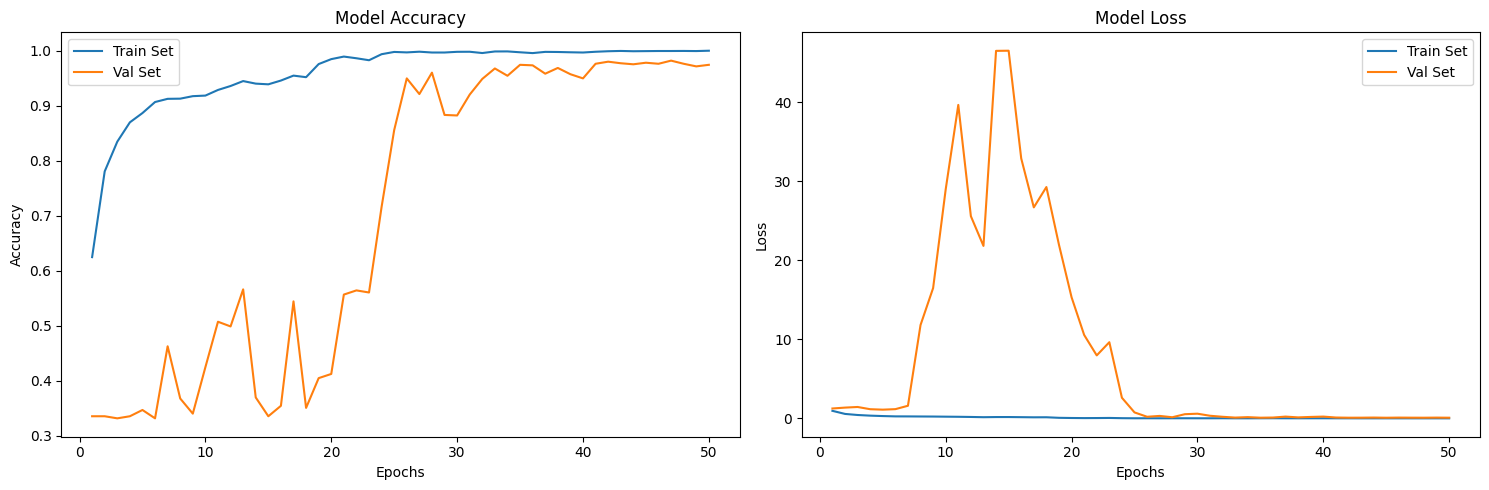

20/20 [==============================] - 0s 10ms/step - loss: 0.1953 - accuracy: 0.9609
Test Accuracy:  96.09
              precision    recall  f1-score   support

      glioma     0.9751    0.9580    0.9665       286
  meningioma     0.9568    0.9366    0.9466       142
   pituitary     0.9433    0.9839    0.9632       186

    accuracy                         0.9609       614
   macro avg     0.9584    0.9595    0.9588       614
weighted avg     0.9612    0.9609    0.9609       614



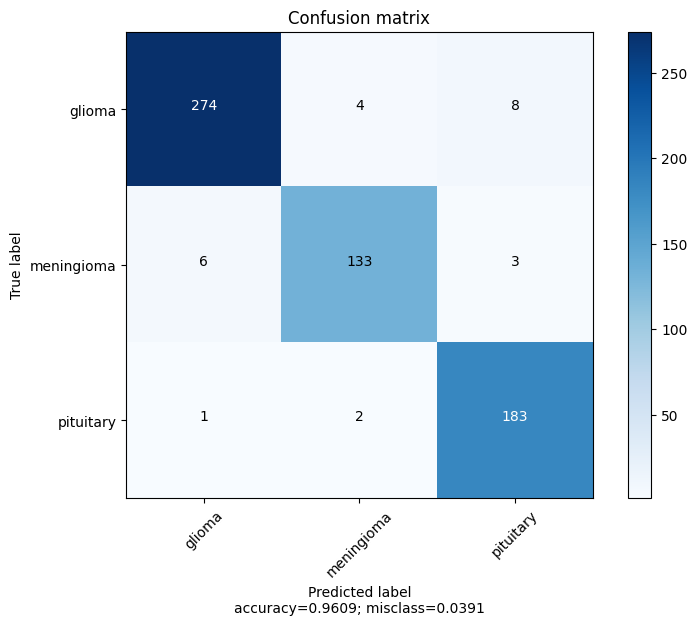

In [4]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = MobileNetV2(weights=None, include_top=False, input_shape=(image_size, image_size, 3), classes=3)
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-MobileNetV2.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 194.66it/s]


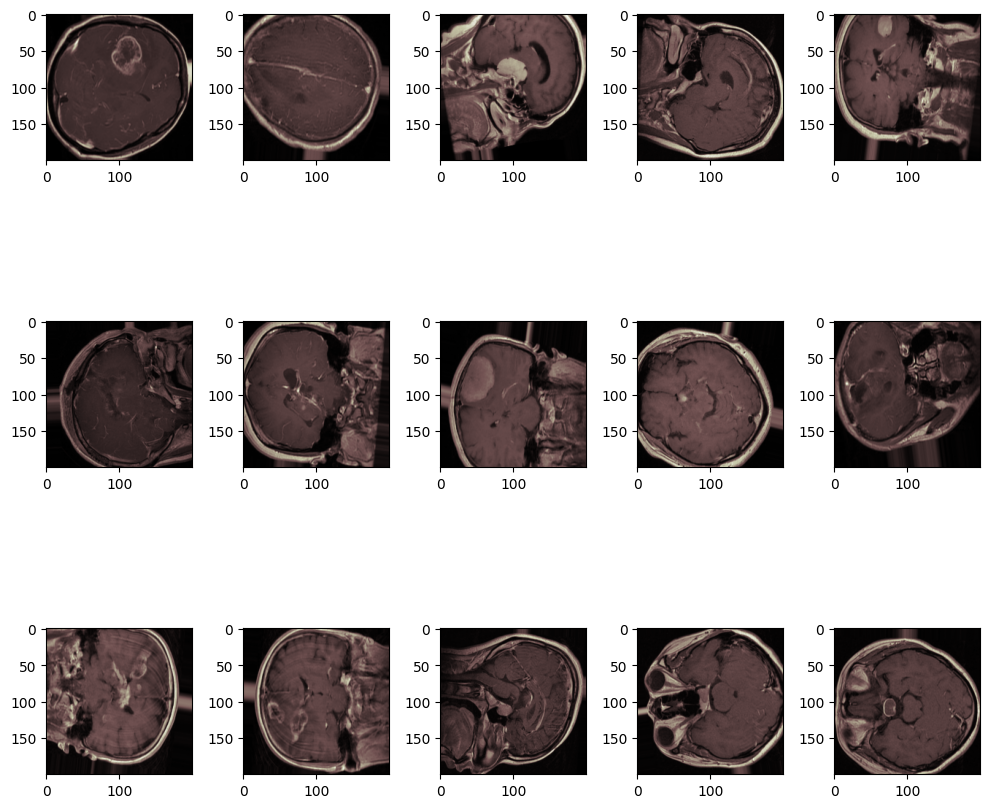

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)
Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 0.8050 - accuracy: 0.7053
Epoch 1: saving model to model-MobileNetV2.h5
Epoch 1: 20.44 seconds
264/264 [==============================] - 20s 68ms/step - loss: 0.8046 - accuracy: 0.7055 - val_loss: 1.3563 - val_accuracy: 0.3321 - lr: 0.0100
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.5352 - accuracy: 0.7960
Epoch 2: saving model to model-MobileNetV2.h5
Epoch 2: 17.17 seconds
264/264 [==============================] - 17s 65ms/step - loss: 0.5351 - accuracy: 0.7960 - val_loss: 4.1355 - val_accuracy: 0.3321 - lr: 0.0100
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.4116 - accuracy: 0.8465
Epoch 3: saving model to model-MobileNetV2.h5
Epoch 3: 17.04 seconds
264/264 [==============================] - 17s 65ms/step - loss: 0.4117 - accuracy: 0.8463 - val_loss: 8.5740 - val_accuracy: 0.3321 - lr: 0.0100
Epoch 4

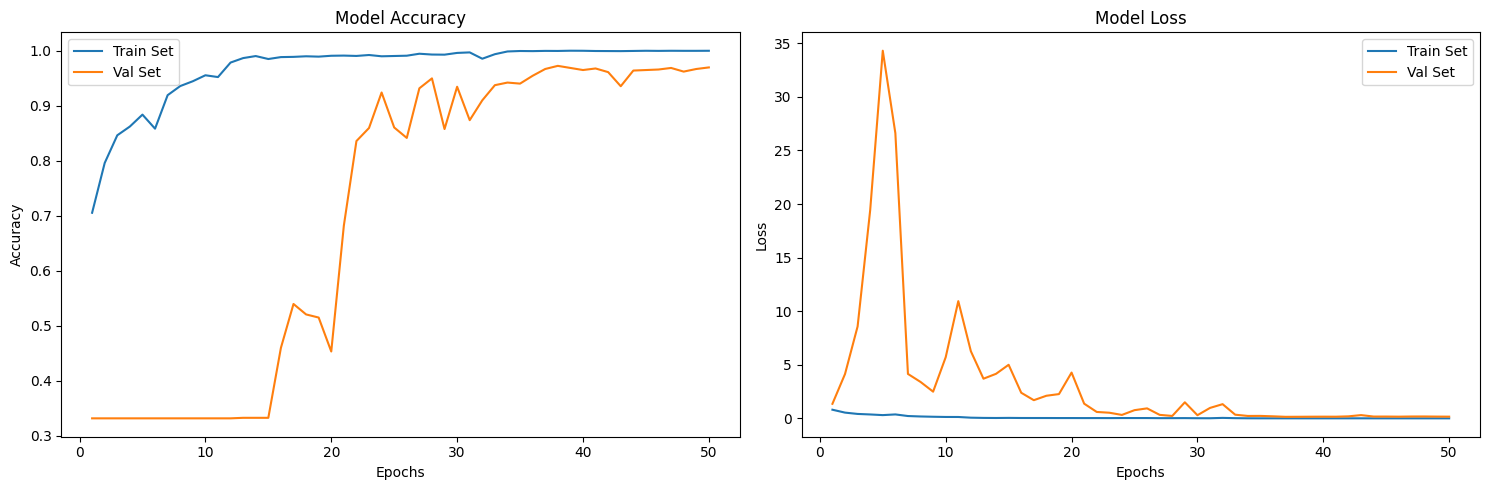

20/20 [==============================] - 0s 8ms/step - loss: 0.2214 - accuracy: 0.9463
Test Accuracy:  94.63
              precision    recall  f1-score   support

      glioma     0.9369    0.9860    0.9608       286
  meningioma     0.9380    0.8521    0.8930       142
   pituitary     0.9674    0.9570    0.9622       186

    accuracy                         0.9463       614
   macro avg     0.9474    0.9317    0.9387       614
weighted avg     0.9464    0.9463    0.9455       614



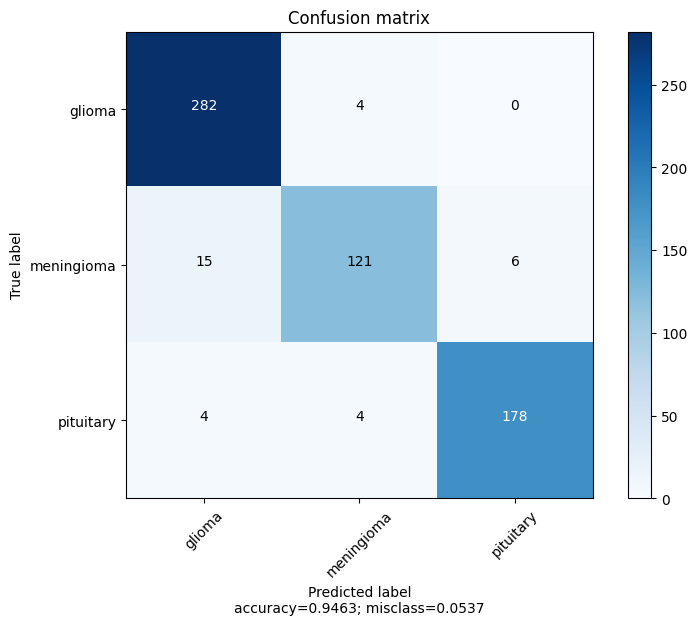

In [6]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = MobileNetV2(weights=None, include_top=False, input_shape=(image_size, image_size, 3), classes=3)
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-MobileNetV2.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 194.58it/s]


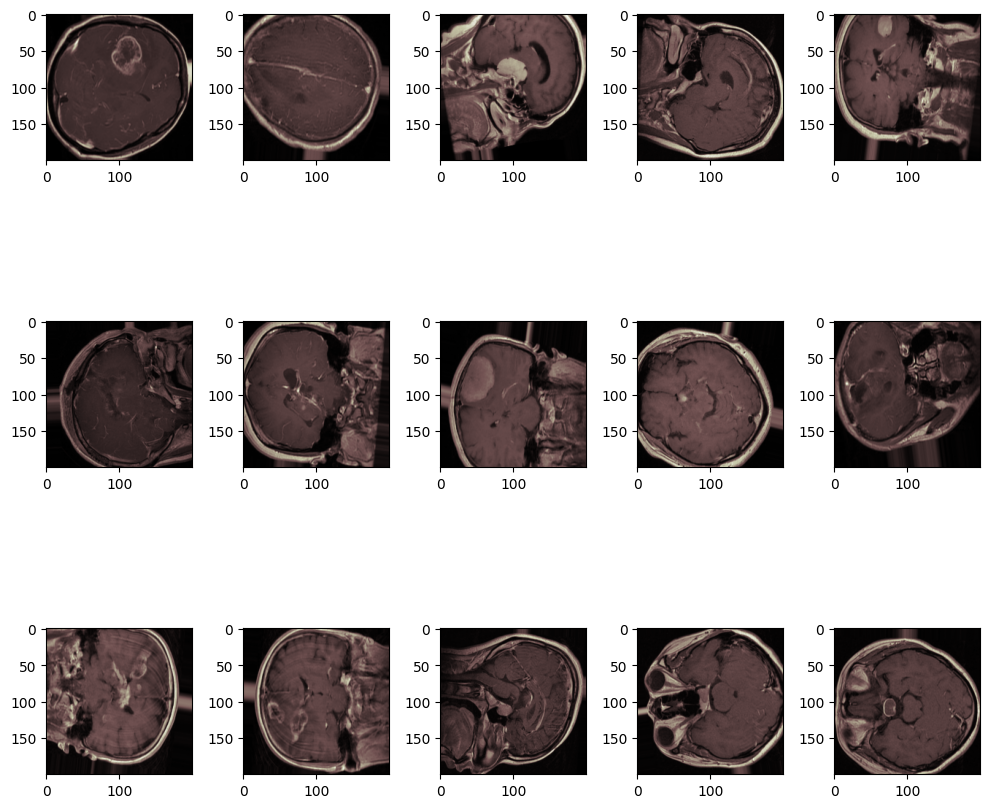

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)
Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 0.8858 - accuracy: 0.6465
Epoch 1: saving model to model-MobileNetV2.h5
Epoch 1: 21.61 seconds
264/264 [==============================] - 22s 72ms/step - loss: 0.8853 - accuracy: 0.6465 - val_loss: 2.4318 - val_accuracy: 0.3321 - lr: 0.0100
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.5597 - accuracy: 0.7756
Epoch 2: saving model to model-MobileNetV2.h5
Epoch 2: 18.17 seconds
264/264 [==============================] - 18s 69ms/step - loss: 0.5597 - accuracy: 0.7756 - val_loss: 1.2982 - val_accuracy: 0.3321 - lr: 0.0100
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.4396 - accuracy: 0.8265
Epoch 3: saving model to model-MobileNetV2.h5
Epoch 3: 18.61 seconds
264/264 [==============================] - 19s 70ms/step - loss: 0.4395 - accuracy: 0.8265 - val_loss: 1.7536 - val_accuracy: 0.3321 - lr: 0.0100
Epoch 4

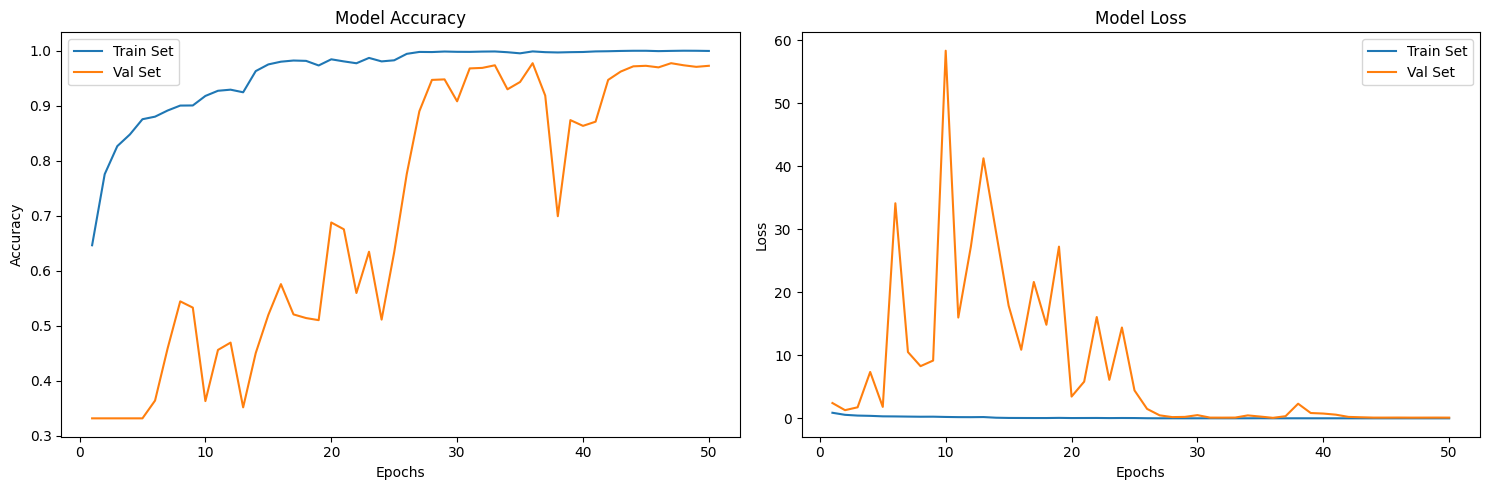

20/20 [==============================] - 0s 10ms/step - loss: 0.2307 - accuracy: 0.9593
Test Accuracy:  95.93
              precision    recall  f1-score   support

      glioma     0.9619    0.9720    0.9670       286
  meningioma     0.9552    0.9014    0.9275       142
   pituitary     0.9581    0.9839    0.9708       186

    accuracy                         0.9593       614
   macro avg     0.9584    0.9524    0.9551       614
weighted avg     0.9592    0.9593    0.9590       614



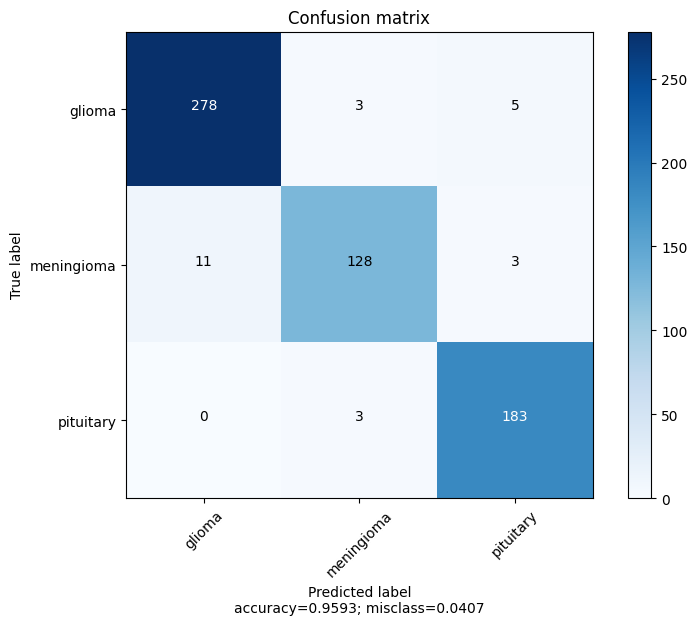

In [8]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = MobileNetV2(weights=None, include_top=False, input_shape=(image_size, image_size, 3), classes=3)
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(filepath='model-MobileNetV2.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)